In [ ]:
import numpy as np
import copy 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rc('font', family='Malgun Gothic')

from sklearn.datasets import load_boston
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


### 1. 지표 소개 및 구현

각 지표를 구현하는 과정을 살펴보도록 하겠습니다. 
강의에서 수식을 통해 살펴보았던 각 지표들이 실제 코드 상으로 구현되는 과정을 익히는 것을 목표로 합니다.

#### 1-1. 평균 오차(Mean Error)

In [83]:

def get_ME(prediction, actual):
    # 평균 오차는 1) 실제 값과 예측 값의 차이를 모두 더한 후, 2) 데이터의 갯수로 나누면 됩니다. 이를 구현하면 아래와 같습니다. 
    error = prediction - actual
    data_num = len(error)
    return np.sum(error) / data_num

#### 1-2. 평균 절대 오차(Mean Absolute Error)

In [84]:
def get_MAE(prediction, actual) :
    # 평균 절대 오차는 1) 실제 값과 예측 값의 차이에 대해 절대값을 취하고 2) 이를 모두 더한 후, 3) 데이터의 갯수로 나누면 됩니다. 이를 구현하면 아래와 같습니다. 
    error = prediction - actual
    abosulte_error = np.abs(error)
    data_num = len(error)
    return np.sum(abosulte_error) / data_num

#### 1-3. 평균 절대 비율 오차(Mean Absolute Percentage Error)

In [85]:
def get_MAPE(prediction, actual, return_instance_wise_error=False):
    # 평균 절대 비율 오차는 1) 실제 값과 예측 값의 차이에 대해 절대값을 취하고 2) 이를 실제 값으로 나눈 후, 3) 이를 모두 더한 후, 4) 데이터의 갯수로 나누면 됩니다. 이를 구현하면 아래와 같습니다. 
    error = prediction - actual
    abosulte_error = np.abs(error)
    percentage_error = abosulte_error / np.maximum(np.abs(actual), 1e-8) # 0으로 나누는 경우를 방지하기 위해 분모에 1e-8을 더해줍니다.
    data_num = len(error)
    mape = np.sum(percentage_error) / data_num
    if return_instance_wise_error:
        return mape, percentage_error
    return mape

#### 1-4. RMSE

In [86]:
def get_RMSE(prediction, actual):
    # 평균 제곱근 오차는 1) 실제 값과 예측 값의 차이에 대해 제곱을 취하고 2) 이를 모두 더한 후, 3) 데이터의 갯수로 나눈 후, 4) 이를 제곱근을 취하면 됩니다. 이를 구현하면 아래와 같습니다. 
    error = prediction - actual
    squared_error = np.square(error)
    data_num = len(error)
    return np.sqrt(np.sum(squared_error) / data_num)

In [87]:
def get_metric_manual(prediction, actual) :
    # 위에서 정의한 4가지 평가지표를 한번 산출하는 함수입니다. 
    me = get_ME(prediction, actual)
    mae = get_MAE(prediction, actual)
    mape = get_MAPE(prediction, actual)
    rmse = get_RMSE(prediction, actual)
    return me, mae, mape, rmse

위에서 선언한 다양한 함수들을 이용해 실제값과 예측값 사이의 지표를 구하는 코드는 아래와 같습니다. 

In [88]:
actuals = np.random.randint(0, 100, 100) # 0부터 100까지의 정수 중에서 100개를 랜덤으로 뽑습니다. 이를 실제값이라고 해봅시다.
predictions = actuals + np.random.normal(0, 10, 100) # 예측값은 실제값과 매우 작은 차이를 가진다고 하겠습니다. 

cnt = 0
for actual, prediction in zip(actuals, predictions) :
    print('실제값 : {}, 예측값 : {}'.format(actual, prediction))
    cnt += 1
    if cnt > 10 :
        break

실제값 : 68, 예측값 : 44.01884192716835
실제값 : 27, 예측값 : 42.2966383472008
실제값 : 77, 예측값 : 65.56794323997129
실제값 : 96, 예측값 : 104.35133555480998
실제값 : 23, 예측값 : 18.973362614250977
실제값 : 90, 예측값 : 98.19045429743596
실제값 : 56, 예측값 : 65.09017510156498
실제값 : 98, 예측값 : 84.45510906250546
실제값 : 68, 예측값 : 62.638281519577205
실제값 : 75, 예측값 : 93.42844613380593
실제값 : 10, 예측값 : -7.479873708352088


In [89]:
me, mae, mape, rmse = get_metric_manual(predictions, actuals)
print(f'ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}') 

ME : 0.8182, MAE : 8.7504, MAPE : 0.5567, RMSE : 10.5829


ME : -0.2071, MAE : 8.5833, MAPE : 0.4946, RMSE : 10.6025  
위와 같은 결과가 도출되었을 때, 각 지표의 특징에 따라 다음과 같은 해석이 가능합니다. 
1. ME : 오차의 평균이 -0.2071이다. 즉, 예측값은 실제값보다 다소 작은 경향이 있다. 
2. MAE : 오차의 절대값의 평균이 8.5833이다. 즉, 예측값과 실제값은 8.58 정도의 차이가 난다. 
3. MAPE : 오차가 실제값의 49.46%만큼 차이가 난다. 즉, 실제값 대비 절반 정도 크기의 차이가 발생한다. 
4. RMSE : 오차의 절대값의 평균이 10.6025 정도이다. 즉, 예측값과 실제값은 10.60 정도 차이가 난다. 

이때, MAE와 RMSE는 모두 오차의 절대값의 평균을 사용한다는 점이 동일합니다. MAE는 절대값을 사용하지만, RMSE는 오차의 제곱합의 제곱근을 사용한다는 점이 다릅니다. 이로인해 MAE는 실제 오차의 크기를 반영하고, RMSE는 오차의 크기가 커질수록 더 크게 반영하게 됩니다. 지표 사용 목적에 따라, 오차가 큰 경우 문제가 생긴다면 RMSE를 사용할 수 있습니다. 

또한, MAPE는 실제값을 분모로 사용하게 되어 왜곡된 결과가 발생할 수 있습니다. 실제값이 0에 가까울 경우 오차가 매우 커지므로 발생하는 문제입니다. 이와 관련하여 아래에서 조금 더 살펴보겠습니다. 

In [90]:
# 데이터를 하나씩 추가하면 MAE, MAPE, RMSE가 어떻게 변하는지 확인해봅시다.

for i in range(1, 101) :
    me, mae, mape, rmse = get_metric_manual(predictions[:i], actuals[:i])
    print(f'{i}번째 데이터까지의 평가 지표 | ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}') 
    if mape > 0.4 :
        print('MAPE가 0.4를 넘었습니다. 이는 예측값이 실제값보다 40% 이상 차이가 난다는 것을 의미합니다.')
        print(f">>> 실제값 : {actuals[i-1]}, 예측값 : {predictions[i-1]}")
        break


1번째 데이터까지의 평가 지표 | ME : -23.9812, MAE : 23.9812, MAPE : 0.3527, RMSE : 23.9812
2번째 데이터까지의 평가 지표 | ME : -4.3423, MAE : 19.6389, MAPE : 0.4596, RMSE : 20.1132
MAPE가 0.4를 넘었습니다. 이는 예측값이 실제값보다 40% 이상 차이가 난다는 것을 의미합니다.
>>> 실제값 : 27, 예측값 : 42.2966383472008


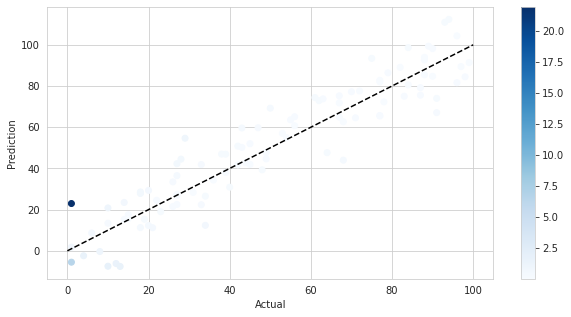

In [91]:
# 산점도를 통해 확인해봅시다.
## 산점도에서 실제값에 따른 MAPE도 함께 시각화하겠습니다. 

sns.set_style('whitegrid')

mape, mape_instance = get_MAPE(predictions, actuals, return_instance_wise_error = True)

# 산점도를 그리기 위해 데이터를 정렬합니다. 
sorted_idx = np.argsort(actuals)
actuals = actuals[sorted_idx]
predictions = predictions[sorted_idx]
mape_instance = mape_instance[sorted_idx]

# 산점도를 그립니다. 
plt.figure(figsize=(10, 5))
plt.scatter(actuals, predictions, c=mape_instance, cmap='Blues')
plt.plot([0, 100], [0, 100], 'k--', alpha=1)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.colorbar()
plt.show()

시각화 결과를 살펴보면, 색이 진할수록 MAPE가 큰 예측/실제값이라고 할 수 있습니다. 이때 0에 가까운 매우 소수의 점에서 MAPE가 크게 나타나고, 나머지 점은 거의 MAPE가 발생하지 않는 것을 볼 수 있습니다. 
MAPE 실제값의 크기에 영향을 받게 됩니다. 오차의 크기는 유지한 채, 실제값의 크기를 매우 크게 만들면 어떻게 변화하는지 살펴보겠습니다.

In [92]:
me, mae, mape, rmse = get_metric_manual(predictions, actuals)
print(f">>> 원래 데이터의 평가 지표                | ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}")
me, mae, mape, rmse = get_metric_manual(predictions+100, actuals+100)
print(f">>> 모든 데이터에 100을 더한 경우의 평가 지표 | ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}")

>>> 원래 데이터의 평가 지표                | ME : 0.8182, MAE : 8.7504, MAPE : 0.5567, RMSE : 10.5829
>>> 모든 데이터에 100을 더한 경우의 평가 지표 | ME : 0.8182, MAE : 8.7504, MAPE : 0.0599, RMSE : 10.5829


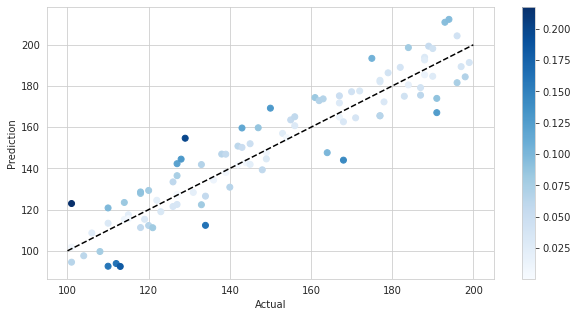

In [93]:

predictions_plus = predictions + 100
actuals_plus = actuals + 100

mape, mape_instance = get_MAPE(predictions_plus, actuals_plus, return_instance_wise_error = True)

# 산점도를 그리기 위해 데이터를 정렬합니다. 
sorted_idx = np.argsort(actuals_plus)
actuals_plus = actuals_plus[sorted_idx]
predictions_plus = predictions_plus[sorted_idx]
mape_instance = mape_instance[sorted_idx]

# 산점도를 그립니다. 
plt.figure(figsize=(10, 5))
plt.scatter(actuals_plus, predictions_plus, c=mape_instance, cmap='Blues')
plt.plot([100, 200], [100, 200], 'k--', alpha=1)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.colorbar()
plt.show()

실제값과 예측값이 동일하게 100만큼 커지자 MAPE가 비교적 균등하게 나타나는 것을 볼 수 있습니다. 

실제 지표 사용 시에는 구현하지 않고, sklearn 내의 구현된 함수들을 사용하게 됩니다. 위 구현체와 아래 함수의 결과는 구현 상의 차이로 다소 결과가 다를 수 있으나 해석은 동일하게 가능합니다. 

In [94]:
def get_metric(prediction, actual) :
    # sklearn의 mean_absolute_error, mean_squared_error, mean_absolute_percentage_error를 이용하여 MAE, RMSE, MAPE를 구하는 함수입니다.
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    me = get_ME(prediction, actual)
    mae = mean_absolute_error(actual, prediction)
    mape = mean_absolute_percentage_error(actual, prediction)
    rmse =mean_squared_error(actual, prediction, squared=False) # squared=False를 통해 RMSE를 구할 수 있습니다.
    return me, mae, mape, rmse

In [95]:
me, mae, mape, rmse = get_metric_manual(predictions, actuals)
print(f">>> 원래 데이터의 평가 지표          | ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}")
me, mae, mape, rmse = get_metric(predictions, actuals)
print(f">>> sklearn의 함수를 이용한 평가 지표 | ME : {me:.4f}, MAE : {mae:.4f}, MAPE : {mape:.4f}, RMSE : {rmse:.4f}")

>>> 원래 데이터의 평가 지표          | ME : 0.8182, MAE : 8.7504, MAPE : 0.5567, RMSE : 10.5829
>>> sklearn의 함수를 이용한 평가 지표 | ME : 0.8182, MAE : 8.7504, MAPE : 0.5567, RMSE : 10.5829


### 2. 데이터 소개

In [96]:

dataset= load_boston()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names
df = pd.DataFrame(X, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Boston 시의 주택 가격에 대한 데이터셋입니다. 
주택 가격을 결정하는 14가지 변수를 이용하여 각 주택의 가격을 예측하는 모델을 훈련시키고자 합니다. 
이때, 어떠한 모델을 활용하면 좋을 지, 모델 평가를 통해 알아보도록 하겠습니다. 우선 데이터 내 변수들은 다음과 같습니다. 

1. CRIM : 지역 별 1인 당 범죄율
2. ZN : 대형 거주 건물 비율
3. INDUX : 비소매 상업 지역의 비율
4. CHAS : 찰스 강 경계 위치 여부
5. NOX : 10ppm 당 농축 일산화질소
6. RM : 주택 1가구 당 평균 방의 수 
7. AGE : 1940년 이전 건축된 주택의 비율
8. DIS : 보스턴 직업 센터까지의 거리
9. RAD : 중심 도로까지의 접근성 수치
10. TAX : 재산세율
11. PTRATIO : 지역 별 학생/교사 비율

### 3. 후보 모델군 

실습에서 사용할 모델은 다음과 같습니다. 오늘 강의는 각 모델에 대한 이해가 목표가 아니기 때문에, 아래와 같이 간략한 설명으로 대체하겠습니다. 다만, 실제 과업 수행을 위해서는 다양한 모델을 후보로 삼을 필요가 있고, 후보 모델에 대한 평가를 통해 최종 모델을 선정하는 과정이 필요하다는 점을 이번 실습의 목표로 삼겠습니다. 

1. 선형회귀 : 전통적인 통계 기반의 예측 및 분석 방법론으로, 주어진 학습 데이터 내 최적의 설명 가능한 직선을 찾습니다. 
2. 의사결정나무 : 각 변수 중 분기할 최적의 변수를 반복적으로 선택하여, 최적의 예측 경우의 수를 찾습니다.
3. SVR : 전통적 통계 기반의 예측 방법론으로, 주어진 학습 데이터를 설명할 수 있는 최적의 곡선을 찾습니다.  

In [97]:
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
SVR = SVR()

### 4. 실제 데이터 분할

주어진 데이터를 분할하여 학습/평가/테스트 용 데이터를 생성하도록 하겠습니다.  
이때 테스트용 데이터는 실제 서비스 및 공정 적용 상황이라 가정하고, 모델 평가에 반영되지 않습니다.  
모델 개발 시에는 기존에 확보된 데이터를 이용하여 최적의 모델을 학습/선정해야 하기 때문에, 학습 및 평가 데이터를 이용하게 됩니다. 

In [98]:
def split_test(X, y, test_size = 0.2) :
    # 데이터를 훈련/평가 데이터와 테스트 데이터로 나누는 함수입니다. 
    ## 전체 데이터 중 테스트 용으로 20%의 데이터를 사용합니다.
    data_num = len(y)
    test_data_num = int(data_num * test_size)
    X_test = X[:test_data_num]
    y_test = y[:test_data_num]
    X_train = X[test_data_num:]
    y_train = y[test_data_num:]
    return X_train, X_test, y_train, y_test

In [99]:
def split_train_val(X_train, y_train, val_size = 0.2, seed = 42) :
    # 훈련 데이터를 훈련 데이터와 검증 데이터로 나누는 함수입니다. 
    ## 훈련 데이터 중 검증 용으로 20%의 데이터를 사용합니다.
    ## 훈련 및 검증은 반복 실험을 통해 신뢰도를 확보할 필요가 있습니다. 
    ## 이를 위해 검증 데이터를 여러 번 바꿔가면 실험할 수 있도록, seed를 인자로 받습니다.
    np.random.seed(seed)
    data_num = len(y_train)
    val_data_num = int(data_num * val_size)
    index = np.random.permutation(data_num)
    X_val = X_train[index[:val_data_num]]
    y_val = y_train[index[:val_data_num]]
    X_train = X_train[index[val_data_num:]]
    y_train = y_train[index[val_data_num:]]
    return X_train, X_val, y_train, y_val

In [100]:
def train_val_model(model, X_train, y_train, X_val, y_val) :
    # 주어진 학습/평가 데이터를 이용하여 모델을 훈련 및 평가하는 함수입니다.
    model_trained = copy.deepcopy(model)
    model_trained.fit(X_train, y_train) # 학습 데이터를 이용하여 모델을 훈련합니다. 
    prediction = model_trained.predict(X_val) # 훈련된 모델을 검증 데이터에 적용하여 예측값을 구합니다.
    me, mae, mape, rmse = get_metric(prediction, y_val) # 예측값과 검증 데이터의 평가지표를 구합니다.
    return prediction, me, mae, mape, rmse

### 5. 모델 평가

위에서 작성된 함수들을 바탕으로 실제 모델을 훈련 및 평가하도록 하겠습니다.  
평가 방식은 모델과 관계없이 동일하게 진행되므로, 평가를 위한 함수 역시 선언하도록 하겠습니다. 

In [101]:
def evaluate_model(model, X_train_and_val, y_train_and_val) :
    # 주어진 전체 데이터를 이용하여 모델을 훈련하고, 전체 데이터에 대한 평가지표를 구하는 함수입니다. 
    me_list = []
    mae_list = []
    mape_list = []
    rmse_list = []
    for seed in range(10) :
        X_train, X_val, y_train, y_val = split_train_val(X_train_and_val, y_train_and_val, val_size = 0.2, seed = seed)
        prediction, me, mae, mape, rmse = train_val_model(model, X_train, y_train, X_val, y_val)
        me_list.append(me)
        mae_list.append(mae)
        mape_list.append(mape)
        rmse_list.append(rmse)
        print(f'SEED : {seed:<2}, ME: {me:<7.3f}, MAE: {mae:<7.3f}, MAPE: {mape:<7.3f}, RMSE: {rmse:<7.3f}')
    print('---------------------------------------------------------------------')
    return {'mean_performance' : [np.mean(me_list), np.mean(mae_list), np.mean(mape_list), np.mean(rmse_list)], 'all_performance' : [me_list, mae_list, mape_list, rmse_list]}

In [102]:
X_train, X_test, y_train, y_test = split_test(X, y, test_size = 0.2)
result_df = pd.DataFrame(columns = ["model", "ME", "MAE", "MAPE", "RMSE"])

print(">>> Linear Regression")
linear_regression_result = evaluate_model(linear_regression, X_train, y_train)
result_df.loc[0] = ["linear_regression"] + linear_regression_result['mean_performance']

print(">>> Decision Tree")
decision_tree_result = evaluate_model(decision_tree, X_train, y_train)
result_df.loc[1] = ["decision_tree"] + decision_tree_result['mean_performance']

print(">>> SVR")
SVR_result = evaluate_model(SVR, X_train, y_train)
result_df.loc[2] = ["SVR"] + SVR_result['mean_performance']

result_df

>>> Linear Regression
SEED : 0 , ME: 0.801  , MAE: 3.769  , MAPE: 0.197  , RMSE: 5.115  
SEED : 1 , ME: -0.436 , MAE: 4.032  , MAPE: 0.216  , RMSE: 5.663  
SEED : 2 , ME: 0.154  , MAE: 3.953  , MAPE: 0.197  , RMSE: 5.860  
SEED : 3 , ME: -0.069 , MAE: 3.595  , MAPE: 0.189  , RMSE: 4.862  
SEED : 4 , ME: -0.363 , MAE: 4.367  , MAPE: 0.205  , RMSE: 6.626  
SEED : 5 , ME: -0.630 , MAE: 3.279  , MAPE: 0.178  , RMSE: 4.608  
SEED : 6 , ME: 0.500  , MAE: 3.680  , MAPE: 0.177  , RMSE: 5.644  
SEED : 7 , ME: -0.374 , MAE: 3.820  , MAPE: 0.173  , RMSE: 5.429  
SEED : 8 , ME: 0.782  , MAE: 2.676  , MAPE: 0.140  , RMSE: 3.482  
SEED : 9 , ME: -0.784 , MAE: 3.975  , MAPE: 0.187  , RMSE: 5.822  
---------------------------------------------------------------------
>>> Decision Tree
SEED : 0 , ME: -0.562 , MAE: 2.838  , MAPE: 0.144  , RMSE: 3.848  
SEED : 1 , ME: 1.037  , MAE: 3.072  , MAPE: 0.182  , RMSE: 4.294  
SEED : 2 , ME: 0.060  , MAE: 2.986  , MAPE: 0.140  , RMSE: 4.811  
SEED : 3 , ME: 0.28

,model,ME,MAE,MAPE,RMSE
0,linear_regression,-0.041769,3.714758,0.185852,5.311066
1,decision_tree,-0.205556,3.108765,0.155112,4.558208
2,SVR,-2.556106,5.984065,0.262550,9.261868


### 6. 최종 모델 선정 및 학습

최종적으로 MAE, MAPE, RMSE에서 가장 작은 값을 보이는 decision tree를 최종 모델로 선정할 수 있습니다.  
최종 모델에 대한 학습 및 시각화를 진행해보도록 하겠습니다. 

#### 6-1. 최종 모델 학습
최종 모델이 선정되었다면, 해당 모델을 이용하여 실제 서비스 및 공정에 적용하기 위해 최종 학습을 진행해야 합니다.  
학습 데이터를 최대한 확보하는 것이 모델 성능에 큰 영향을 미칠 수 있기 때문에, 학습/평가 데이터를 모두 이용하여 최종 모델을 학습하도록 하겠습니다.  
본 교육에서는 다른 두 모델의 평가 성능과 실제 성능의 차이도 살펴보기 위해 최종 학습을 진행하겠습니다. 

In [107]:
decision_tree_prediction, decision_tree_me, decision_tree_mae, decision_tree_mape, decision_tree_rmse = train_val_model(decision_tree, X_train, y_train, X_test, y_test)
print(f"MODEL : Decision Tree,      ME: {decision_tree_me:<7.3f}, MAE: {decision_tree_mae:<7.3f}, MAPE: {decision_tree_mape:<7.3f}, RMSE: {decision_tree_rmse:<7.3f}")

linear_regression_prediction, linear_regression_me, linear_regression_mae, linear_regression_mape, linear_regression_rmse = train_val_model(linear_regression, X_train, y_train, X_test, y_test)
print(f"MODEL : Linear Regression,  ME: {linear_regression_me:<7.3f}, MAE: {linear_regression_mae:<7.3f}, MAPE: {linear_regression_mape:<7.3f}, RMSE: {linear_regression_rmse:<7.3f}")

SVR_prediction, SVR_me, SVR_mae, SVR_mape, SVR_rmse = train_val_model(SVR, X_train, y_train, X_test, y_test)
print(f"MODEL : SVR,                ME: {SVR_me:<7.3f}, MAE: {SVR_mae:<7.3f}, MAPE: {SVR_mape:<7.3f}, RMSE: {SVR_rmse:<7.3f}")


MODEL : Decision Tree,      ME: 0.902  , MAE: 2.555  , MAPE: 0.126  , RMSE: 3.297  
MODEL : Linear Regression,  ME: 0.257  , MAE: 2.638  , MAPE: 0.119  , RMSE: 3.546  
MODEL : SVR,                ME: 1.153  , MAE: 4.142  , MAPE: 0.203  , RMSE: 5.470  
